In [12]:
import os
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

Determine whether or not we are using train or test data

In [2]:
train = True

if train:
    path = test_path = os.path.abspath('../dataset/nyu_hand_dataset_v2/dataset/test/')
else:
    path = train_path = os.path.abspath('../dataset/nyu_hand_dataset_v2/dataset/train/')

Load the data annotations for the data

In [3]:
data = sio.loadmat(os.path.join(path, 'joint_data.mat'))
joint_names = data['joint_names']
joint_uvd = data['joint_uvd']
joint_xyz = data['joint_xyz']

Generate format strings for the different types of images

In [4]:
rgb_format = 'rgb_{k}_{f:07d}.png'

Use format strings along with indices to generate the image file names.

In [5]:
image_index = 1 # range from 1 - 3 max is (np.size(joint_uvd, 0))
kinect_index = 2 # range from 1 - 8252 max is (np.size(joint_uvd, 1))
rgb_string = rgb_format.format(k = image_index, f=kinect_index)

Determine the width and height of the images in the nyu dataset

In [6]:

# for imIdx in range(1, 4):
#     for kinectIdx in range(3000, 3100):
#         rgb_string = rgb_format.format(k = image_index, f=kinect_index)
#         rgb = plt.imread(os.path.join(path, rgb_string))
#         assert(np.shape(rgb) == (480, 640, 3))

    


In [7]:
jnt_uvd = np.squeeze(joint_uvd[image_index - 1, kinect_index - 1, :, :]) # joint u, v, depth data
n = np.size(jnt_uvd,0) # number of joints
jnt_uv = jnt_uvd[:, :-1]
jnt_uvd[:, 2] = 0

print(jnt_uvd)
print(n)
print(jnt_uv)

[[169.06326294 199.74177551   0.        ]
 [169.60884094 209.54194641   0.        ]
 [172.18386841 222.3327179    0.        ]
 [174.30741882 231.51060486   0.        ]
 [176.56065369 240.12765503   0.        ]
 [176.46026611 255.99645996   0.        ]
 [201.88148499 178.18490601   0.        ]
 [198.6799469  189.12835693   0.        ]
 [197.50683594 205.21633911   0.        ]
 [197.21109009 215.42274475   0.        ]
 [200.35552979 228.49049377   0.        ]
 [201.34544373 243.49697876   0.        ]
 [223.90814209 167.14459229   0.        ]
 [221.1350708  181.25268555   0.        ]
 [218.89341736 197.63253784   0.        ]
 [216.87115479 208.58184814   0.        ]
 [217.08294678 229.44813538   0.        ]
 [216.75788879 248.45617676   0.        ]
 [251.06661987 180.85675049   0.        ]
 [248.02957153 191.65420532   0.        ]
 [244.73162842 206.39421082   0.        ]
 [241.3269043  218.38894653   0.        ]
 [238.27301025 236.65519714   0.        ]
 [234.43710327 258.93533325   0.  

<IPython.core.display.Javascript object>


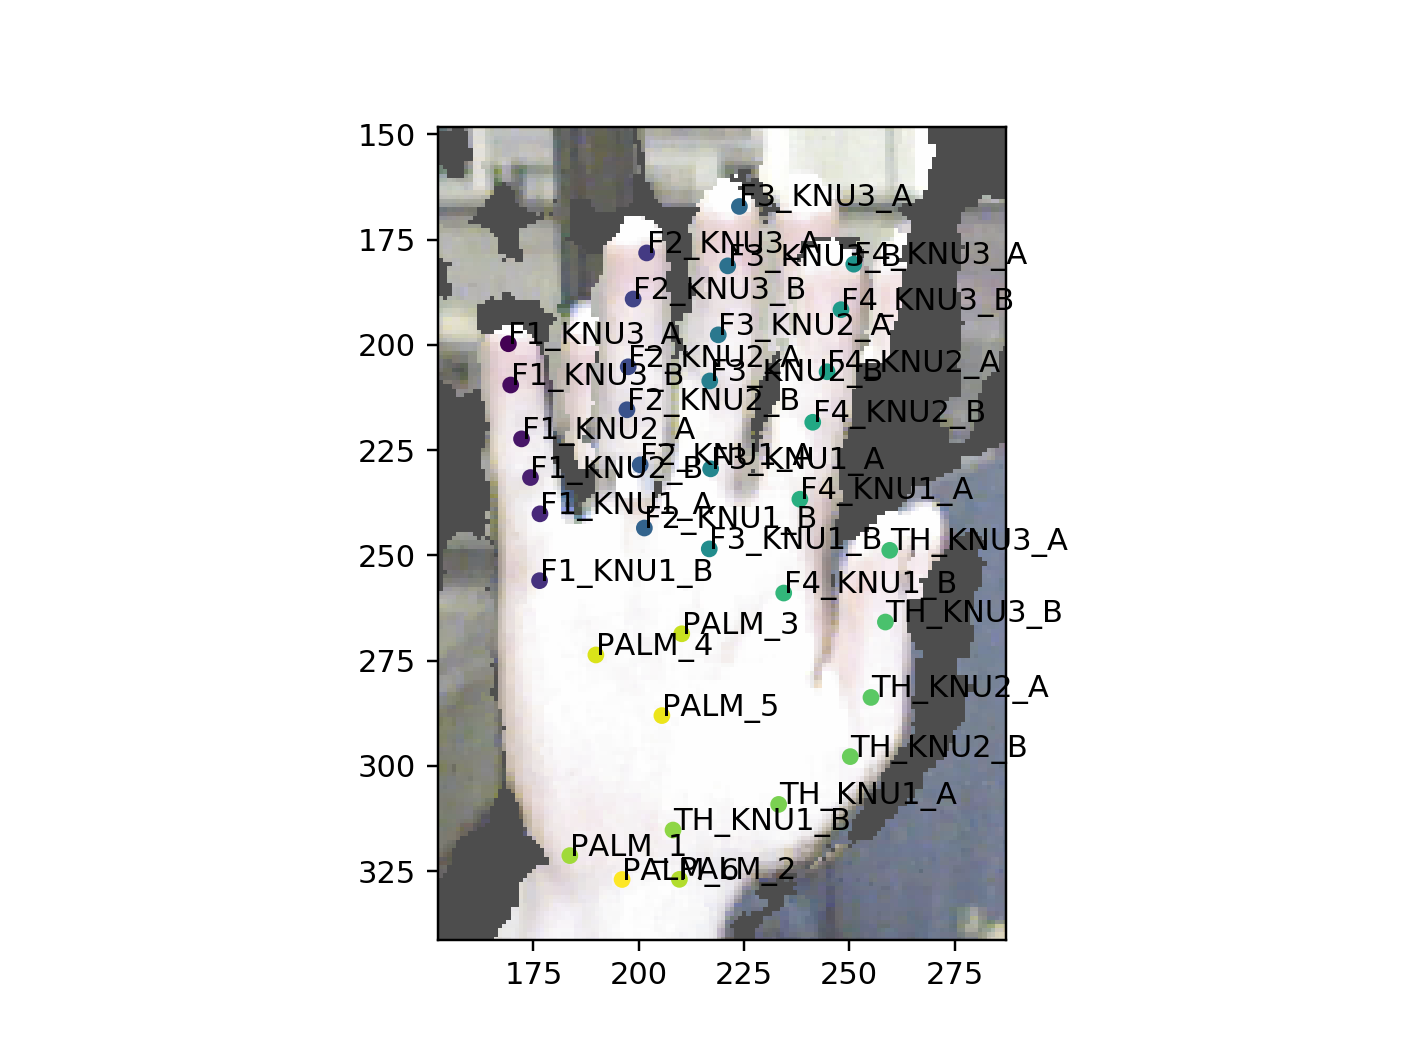

In [13]:
jnt_uvd = np.squeeze(joint_uvd[image_index - 1, kinect_index - 1, :, :]) # joint u, v, depth data
n = np.size(jnt_uvd,0) # number of joints
jnt_scales = 20 *np.ones(n)
jnt_colors = np.arange(n); # random colors

rgb = plt.imread(os.path.join(path, rgb_string))
w, h = np.shape(rgb)[:-1]
plt.imshow(rgb, alpha=.7) # display the image
# display the x, y, scale, and color of joints 
plt.scatter(x=jnt_uvd[:, 0], y=jnt_uvd[:, 1], s = jnt_scales, c = jnt_colors)
for ind, jnt in enumerate(jnt_uvd[:, 0:2]):
    plt.annotate(joint_names[0][ind][0], (jnt[0],jnt[1]))
plt.show()

[('F1_KNU3_A', 'F1_KNU3_B'), ('F1_KNU3_B', 'F1_KNU2_A'), ('F1_KNU2_A', 'F1_KNU2_B'), ('F1_KNU2_B', 'F1_KNU1_A'), ('F1_KNU1_A', 'F1_KNU1_B'), ('F2_KNU3_A', 'F2_KNU3_B'), ('F2_KNU3_B', 'F2_KNU2_A'), ('F2_KNU2_A', 'F2_KNU2_B'), ('F2_KNU2_B', 'F2_KNU1_A'), ('F2_KNU1_A', 'F2_KNU1_B'), ('F3_KNU3_A', 'F3_KNU3_B'), ('F3_KNU3_B', 'F3_KNU2_A'), ('F3_KNU2_A', 'F3_KNU2_B'), ('F3_KNU2_B', 'F3_KNU1_A'), ('F3_KNU1_A', 'F3_KNU1_B'), ('F4_KNU3_A', 'F4_KNU3_B'), ('F4_KNU3_B', 'F4_KNU2_A'), ('F4_KNU2_A', 'F4_KNU2_B'), ('F4_KNU2_B', 'F4_KNU1_A'), ('F4_KNU1_A', 'F4_KNU1_B'), ('TH_KNU3_A', 'TH_KNU3_B'), ('TH_KNU3_B', 'TH_KNU2_A'), ('TH_KNU2_A', 'TH_KNU2_B'), ('TH_KNU2_B', 'TH_KNU1_A'), ('TH_KNU1_A', 'TH_KNU1_B'), ('THU_KNU1_B', 'PALM_2'), ('PALM_2', 'PALM_6'), ('PALM_6', 'PALM_1'), ('PALM_6', 'PALM_5'), ('PALM_4', 'PALM_5'), ('PALM_3', 'PALM_5'), ('F1_KNU1_B', 'PALM_4'), ('F2_KNU1_B', 'PALM_4'), ('F3_KNU1_B', 'PALM_3'), ('F4_KNU1_B', 'PALM_3')]


In [14]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


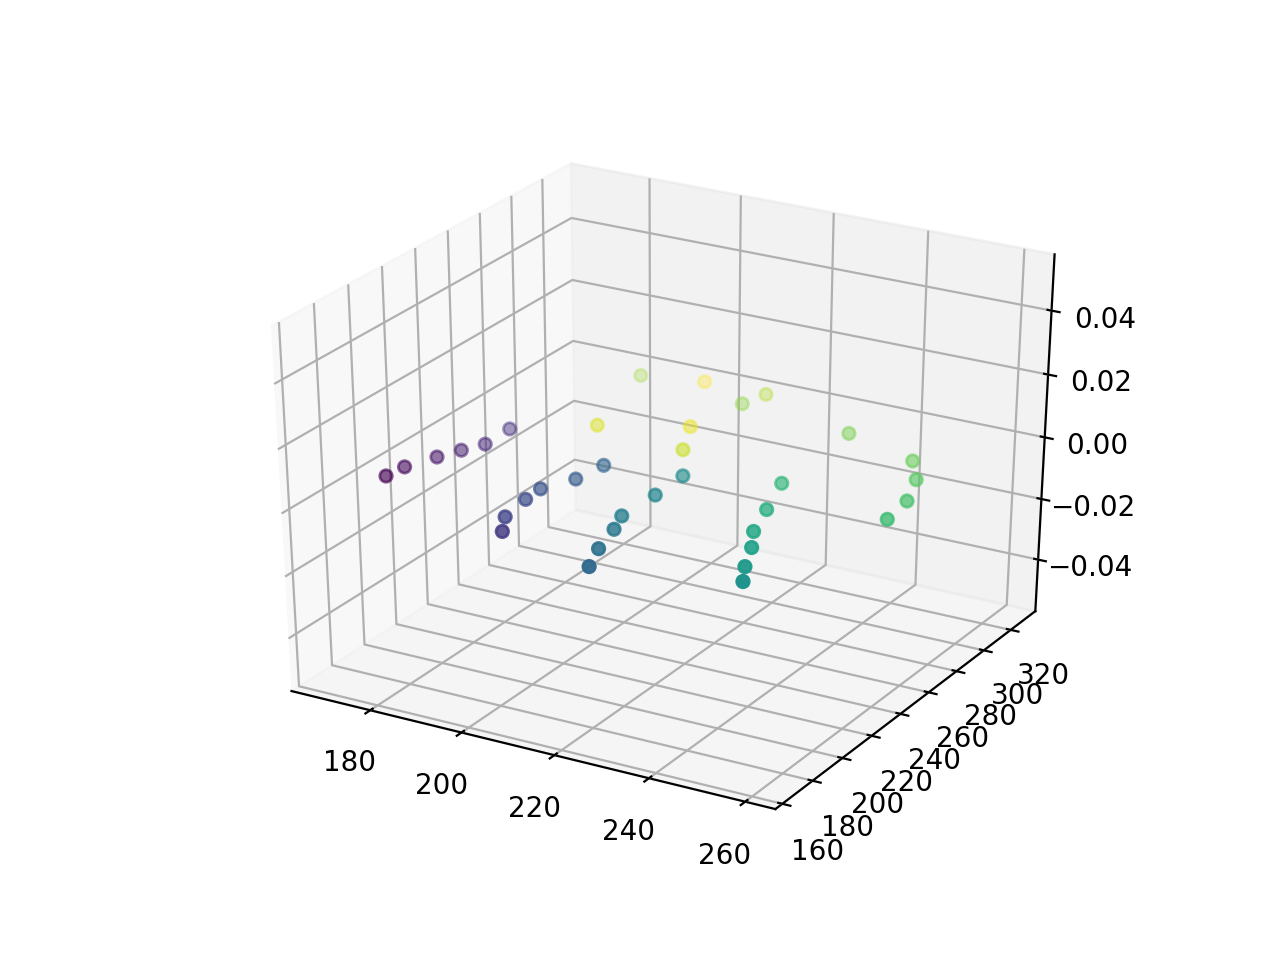

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=jnt_uvd[:, 0], ys=jnt_uvd[:, 1], zs = jnt_uvd[:, 2], s = jnt_scales, c = jnt_colors)

In [92]:
alljoints = ""
for x in joint_names:
    for y in x:
        alljoints = alljoints + "'" + y[0] + "', "
alljoints

"'F1_KNU3_A', 'F1_KNU3_B', 'F1_KNU2_A', 'F1_KNU2_B', 'F1_KNU1_A', 'F1_KNU1_B', 'F2_KNU3_A', 'F2_KNU3_B', 'F2_KNU2_A', 'F2_KNU2_B', 'F2_KNU1_A', 'F2_KNU1_B', 'F3_KNU3_A', 'F3_KNU3_B', 'F3_KNU2_A', 'F3_KNU2_B', 'F3_KNU1_A', 'F3_KNU1_B', 'F4_KNU3_A', 'F4_KNU3_B', 'F4_KNU2_A', 'F4_KNU2_B', 'F4_KNU1_A', 'F4_KNU1_B', 'TH_KNU3_A', 'TH_KNU3_B', 'TH_KNU2_A', 'TH_KNU2_B', 'TH_KNU1_A', 'TH_KNU1_B', 'PALM_1', 'PALM_2', 'PALM_3', 'PALM_4', 'PALM_5', 'PALM_6', "

In [16]:
x = joint_names[0][1][0]
str(x)

'F1_KNU3_B'

In [19]:
image_rec = rgb.shape[:-1]
mask_miss = np.zeros(image_rec, dtype=np.uint8)
mask_miss[..., None]

array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]], dtype=uint8)

In [23]:
x = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])

In [26]:
x
x.flatten()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])